In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import glob
import sys
import pandasql as pdsql

sys.path.append("..")
import analysislib as alib

# ABOVE ZNONEOFTHE

root = "../.."

In [10]:
sq = lambda q: pdsql.sqldf(q, globals())
sqflat = lambda q: alib.flatten(pdsql.sqldf(q, globals()).values.tolist())

In [50]:
dffinch = pd.read_csv(f"{root}/data/2025-03-04-time-18-40-26-second-run-finch2/master.csv")

In [26]:
dfraven = pd.read_csv(f"{root}/data/2025-07-10-time-23-59-28-raven3-benchmark/master.csv")
dfraven["readBW_GB"] = df["readBW_bytes"]/(1024.0 * 1024.0 * 1024.0)
dfraven["writeBW_GB"] = df["writeBW_bytes"]/(1024.0 * 1024.0 * 1024.0)
dfraven["avgreadlat_us"] = df["avgreadlat_ns"]/1000.0
dfraven["avgwritelat_us"] = df["avgwritelat_ns"]/1000.0

In [ ]:
dffinch = pd.read_csv(f"{root}/data/2025-07-10-time-23-59-28-raven3-benchmark/master.csv")
dffinch["readBW_GB"] = df["readBW_bytes"]/(1024.0 * 1024.0 * 1024.0)
dffinch["writeBW_GB"] = df["writeBW_bytes"]/(1024.0 * 1024.0 * 1024.0)
dffinch["avgreadlat_us"] = df["avgreadlat_ns"]/1000.0
dffinch["avgwritelat_us"] = df["avgwritelat_ns"]/1000.0

In [35]:
df.columns

Index(['Unnamed: 0', 'cbSize', 'cioengine', 'ciodepth', 'crw', 'cnproc',
       'cdevice', 'cdirect', 'cmemlim', 'cfile', 'readBW_bytes', 'readBW',
       'writeBW_bytes', 'writeBW', 'avgreadlat_ns', 'avgreadlat',
       'avgwritelat_ns', 'avgwritelat', 'USR_UTIL_perc', 'SYS_UTIL_perc',
       'IOW_UTIL_perc', 'IDL_UTIL_perc', 'CPU_UTIL_perc',
       'diskutil-TOTAL_READS(KB)', 'diskutil-TOTAL_WRITES(KB)',
       'diskutil-TOTAL_READS(MB)', 'diskutil-TOTAL_WRITES(MB)',
       'diskutil-TOTAL_READS(GB)', 'diskutil-TOTAL_WRITES(GB)',
       'diskutil-rMB/s', 'diskutil-wMB/s', 'diskutil-AVGRQ-SZ',
       'diskutil-AVGQU-SZ', 'diskutil-DEV_UTIL', 'readBW_GB', 'writeBW_GB',
       'avgreadlat_us', 'avgwritelat_us'],
      dtype='object')

In [34]:
with open(f"{root}/data/2025-07-10-time-23-59-28-raven3-benchmark/fio-config.txt") as f:
    print(f.read())

with open(f"{root}/data/2025-07-10-time-23-59-28-raven3-benchmark/fio-config.txt") as f:
    print(f.read())

Devices: ssd zram0 zram1 zram2
Total file size during runs: 34359738368
Block sizes: 4096 65536
Numbers of processes: 32 64
Read/write type options: read write rw randread randwrite randrw
Async I/O engines: libaio io_uring
Async I/O depths: 128 2056
Sync I/O engines: sync mmap



In [49]:
sq("""
    SELECT cdevice, readBW_GB, writeBW_GB, avgreadlat_us, avgwritelat_us
    FROM df
    WHERE crw='randread' AND cioengine='sync' AND cnproc=32 AND cbsize=4096
""")

,cdevice,readBW_GB,writeBW_GB,avgreadlat_us,avgwritelat_us
0,zram-lz4,2.375297,0.0,43.522307,0.0
1,zram-zstd,1.350382,0.0,45.329374,0.0
2,ssd,0.781593,0.0,146.139330,0.0
3,zram-lzo,2.395748,0.0,44.263953,0.0


IndexError: list index out of range

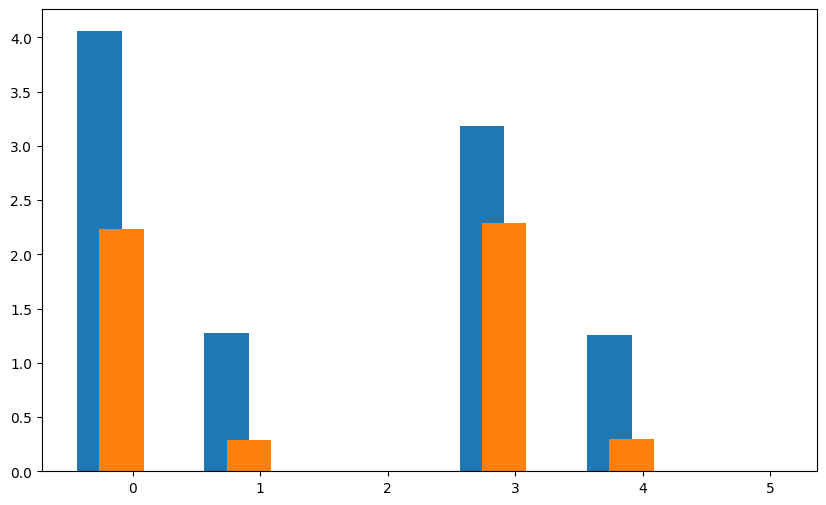

In [20]:
params = "crw, cdevice, readBW_bytes, writeBW_bytes, avgreadlat_ns, avgwritelat_ns"
outDir = f"{root}/2025-07-21-raven3"

query = """
     SELECT {}
     FROM raven
     WHERE cioengine='io_uring' AND ciodepth='128' AND cnproc='64'
"""
df = sq(query.format(params))
df["readBW_GB"] = df["readBW_bytes"]/(1024.0 * 1024.0 * 1024.0)
df["writeBW_GB"] = df["writeBW_bytes"]/(1024.0 * 1024.0 * 1024.0)
df["avgreadlat_us"] = df["avgreadlat_ns"]/1000.0
df["avgwritelat_us"] = df["avgwritelat_ns"]/1000.0

alib.grouped_barplot(
     
)